# Spark Funds Investement Analysis

### Submitted By: Shailendra Kadre, June 1 2020 PGD ML & AI Batch

### The Problem Statement

"""Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

For the analysis, I consider a country to be English speaking only if English is one of the official languages in that country

These conditions will give you sufficient information for your initial analysis. Before getting to specific questions, let’s understand the problem and the data first."""

#### Description

"""
1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

2. Where does the data come from? 
The data is taken real investment data from crunchbase.com, so the insights one may get may be incredibly useful. For this assignment, the the data is divided into the following files:

Three main data tables to be used for the entire analysis. They are given in the code section. 

3. What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goals of data analysis: The goals are divided into three sub-goals:

Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.) """

### Import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Supress Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read the project CSV files and get basic meta data, print the first few header rows, and print basic stats

#### The companies file

In [4]:
df_companies = pd.read_csv('C:\\AA SK 50\\A Shailendra 16 May 13\\A Shailendra\\IIITB PGD\\Spark Funds Investement Assignment\\companies.csv', encoding='latin1')
df_companies.head()

permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

In [19]:
print(df_companies.shape)
print(df_companies.info())

(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None


In [23]:
df_companies.describe()

permalink    name                homepage_url  \
count                              66368   66367                       61310   
unique                             66368   66099                       61191   
top     /Organization/Abreos-Biosciences  #NAME?  http://www.askforoffer.com   
freq                                   1       4                           5   

       category_list     status country_code state_code       region  \
count          63220      66368        59410      57821        58338   
unique         27296          4          137        311         1092   
top         Software  operating          USA         CA  SF Bay Area   
freq            3995      53034        37601      12900         8804   

                 city  founded_at  
count           58340       51147  
unique           5111        3978  
top     San Francisco  01-01-2012  
freq             3526        2730

In [5]:
df_companies['category_list'].nunique()

27296

#### The rounds2 file

In [6]:
df_rounds2 = pd.read_csv('C:\\AA SK 50\\A Shailendra 16 May 13\\A Shailendra\\IIITB PGD\\Spark Funds Investement Assignment\\rounds2.csv', encoding='latin1')
df_rounds2.head()

company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

In [24]:
print(df_rounds2.shape)
print(df_rounds2.info())

(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [25]:
df_rounds2.describe()

raised_amount_usd
count       9.495900e+04
mean        1.042687e+07
std         1.148212e+08
min         0.000000e+00
25%         3.225000e+05
50%         1.680511e+06
75%         7.000000e+06
max         2.127194e+10

In [52]:
df_rounds2[['company_permalink','funding_round_permalink','funding_round_type','funding_round_code','funded_at']].describe()

company_permalink  \
count                     114949   
unique                     90247   
top     /ORGANIZATION/SOLARFLARE   
freq                          10   

                                funding_round_permalink funding_round_type  \
count                                            114949             114949   
unique                                           114949                 14   
top     /funding-round/6b33ae813b0612ef9888fc0423298b9a            venture   
freq                                                  1              55494   

       funding_round_code   funded_at  
count               31140      114949  
unique                  8        5033  
top                     A  01-01-2014  
freq                14747         779

#### The mapping file

In [7]:
df_mapping = pd.read_csv('C:\\AA SK 50\\A Shailendra 16 May 13\\A Shailendra\\IIITB PGD\\Spark Funds Investement Assignment\\mapping.csv', encoding='latin1')
df_mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [26]:
print(df_mapping.shape)
print(df_mapping.info())

(688, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB
None


In [27]:
df_mapping.describe()

Automotive & Sports      Blanks  Cleantech / Semiconductors  \
count           688.000000  688.000000                  688.000000   
mean              0.031977    0.001453                    0.077035   
std               0.176066    0.038125                    0.266841   
min               0.000000    0.000000                    0.000000   
25%               0.000000    0.000000                    0.000000   
50%               0.000000    0.000000                    0.000000   
75%               0.000000    0.000000                    0.000000   
max               1.000000    1.000000                    1.000000   

       Entertainment      Health  Manufacturing  News, Search and Messaging  \
count     688.000000  688.000000     688.000000                  688.000000   
mean        0.129360    0.091570       0.058140                    0.104651   
std         0.335843    0.288627       0.234177                    0.306326   
min         0.000000    0.000000       0.000000                    0.000000   
25%         0.000000    0.000000       0.000000                    0.000000   
50%         0.000000    0.000000       0.000000                    0.000000   
75%         0.000000    0.000000       0.000000                    0.000000   
max         1.000000    1.000000       1.000000                    1.000000   

           Others  Social, Finance, Analytics, Advertising  
count  688.000000                               688.000000  
mean     0.283430                                 0.222384  
std      0.450991                                 0.416150  
min      0.000000                                 0.000000  
25%      0.000000                                 0.000000  
50%      0.000000                                 0.000000  
75%      1.000000                                 0.000000  
max      1.000000                                 1.000000

In [50]:
df_mapping['category_list'].nunique()

687

#### Plotting hitograms for all the dataframes to get a feel of numeric columns destribution

In [29]:
#df_companies.hist()
# No numeric columns to print histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FBB12A808>]],
      dtype=object)

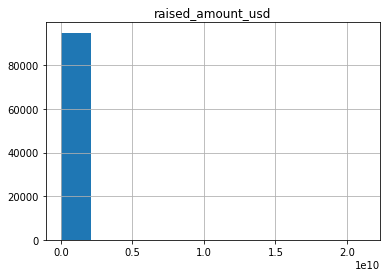

In [30]:
df_rounds2.hist()

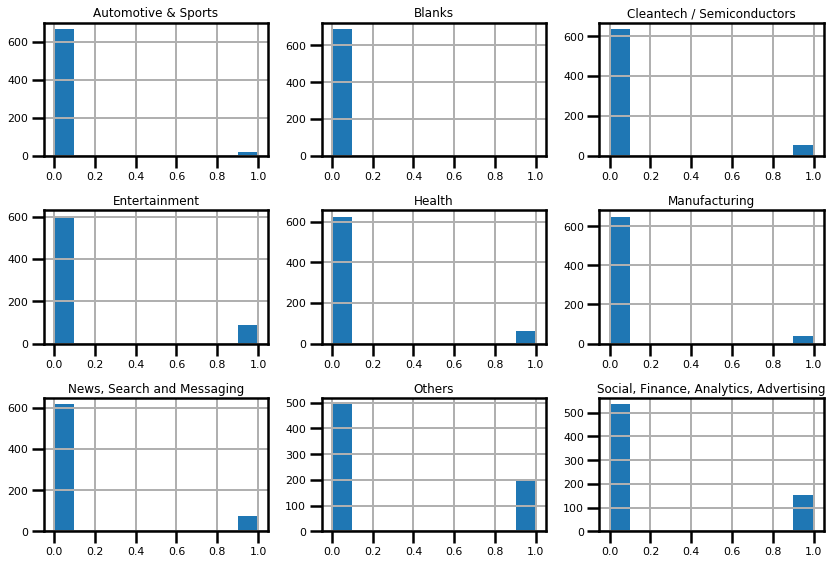

In [40]:
sns.set_context('poster',font_scale=0.5)
df_mapping.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

##### Inference: none of the variables in any of the dataframe is normally distributed. On the contrary we see a very polarized concentration of frequencies around 0 and 1 for all the variables

#### Plotting pairplots for all the eligible dataframes

In [538]:
#sns.pairplot(df_mapping)

##### Inference: in none of the variable scatter plots, we see a straight line relationship or any strong correlation as expected. Virtually there is no meaning of plotting of these Scatter plots

### Table relationships

##### df_companies table has Permalink column, which is related to the column  company_permalink of df_rounds2 table. Both the columns are the unique ids of companies

##### df_companies table has category_list, which is related to category_list column of df_mapping

### Checkpoint 1: Data Cleaning 1

#### Remove the special characters in companies df_dataframe columns (if any) - permalink & name 

In [8]:
df_companies['permalink']=df_companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
df_companies['name']=df_companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore')

In [539]:
#df_companies.head()

In [9]:
# Convert the columns company_permalink and permalink and name to lowercase to avoid duplicates due to difference in case
df_companies.permalink = df_companies.permalink.apply(lambda x: x.lower())
df_companies['name']=df_companies['name'].str.lower()

In [10]:
unique_df_companies = len(df_companies.permalink.unique())
print(unique_df_companies)

66368


#### Removing special characters in df_rounds2 columns - company_permalink & funding_round_permalink

In [11]:

df_rounds2['company_permalink']=df_rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
df_rounds2['funding_round_permalink']=df_rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [12]:
# Convert the columns company_permalink and permalink and name to lowercase to avoid duplicates due to difference in case
df_rounds2.company_permalink = df_rounds2.company_permalink.apply(lambda x: x.lower())

In [13]:
unique_df_rounds2 = len(df_rounds2['company_permalink'].unique())
print(unique_df_rounds2)

66368


In [14]:
#Are there any companies in the rounds2 file which are not  present in companies ? Answer N.
df_companies.loc[~df_rounds2.company_permalink.isin(df_companies.permalink)]

Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []

In [21]:
# Merging two table into master_frame
master_frame = pd.merge(df_rounds2, df_companies, how='inner', left_on=['company_permalink'], right_on=['permalink'])
print(master_frame.shape)

(114949, 16)


#### Inference: now table 1.1 'Understand the Data Set' can be fully populated. Completed Check Point 1.

#### Checking for null values in master_frame

In [81]:
print(master_frame.shape)
master_frame.isnull().sum()

(114949, 16)


permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

#### Inference: max around aprrox. 17% are null in founded_at and raised_amount_usd

In [543]:
#master_frame.head()

In [85]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

##### Removing rows with raised_amount_usd as NaN

In [61]:
master_frame_dropnull = master_frame[master_frame['raised_amount_usd'].notnull()]

In [62]:
master_frame_dropnull.shape

(94959, 16)

In [544]:
#master_frame_dropnull.columns

In [545]:
#master_frame_dropnull.isnull().sum()

##### funding_round_code has a lot of null value. It can be dropped if not needed at a later stage

#### Treatmen for outliers

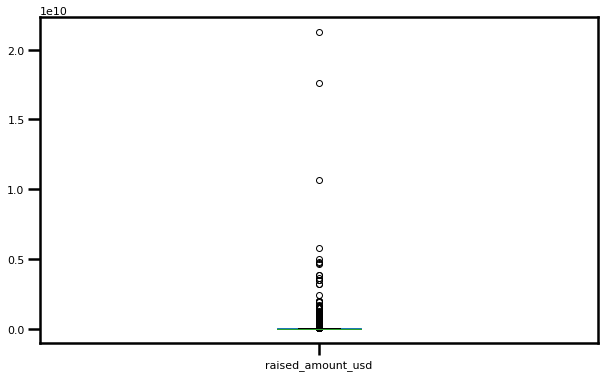

In [105]:
master_frame_dropnull.plot.box(figsize=(10,6))

#### Inference: heavy amount of outliers as shown by the boxplot. We will proceed with outlier treatment further after filtering the master_frame as suggested in Check Point 2

#### We will coming back to null value treatment and outlier treatment in the Check Point 2

### Checkpoint 2: Funding Type Analysis

#### The Task and Objectives

In [155]:
"""This is the first of the three goals of data analysis – investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), 
its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. 
For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a 
relatively higher amount of investment. Private equity type investments are associated with much larger companies and 
involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. 
This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 
Spark Funds wants to choose one of these four investment types for each potential investment they will make.

TASK 1. Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

TASK 2. Calculate the most representative value of the investment amount for each of the four funding types 
(venture, angel, seed, and private equity) and report the answers in Table 2.1

Based on the most representative investment amount calculated above, which investment type do you think is the most 
suitable for Spark Funds?

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type 
is the most suitable for it? Identify the investment type 

TASK 3. For further analysis, filter the data so it only contains the chosen investment type. """

'This is the first of the three goals of data analysis – investment type analysis.\n\nThe funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), \nits stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. \nFor example, seed, angel and venture are three common stages of startup funding.\n\nSeed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a \nrelatively higher amount of investment. Private equity type investments are associated with much larger companies and \ninvolve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. \nThis means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.\n \nSpark Funds wants to choose one of these four investment types for each potential i

In [546]:
#master_frame_dropnull['funding_round_type'].unique()

In [64]:
# Filtering master_frame_dropnull for venture, angel, seed, and private equity
desired_cat = ['venture', 'angel', 'seed', 'private_equity']
master_frame_dropnull = master_frame_dropnull[master_frame_dropnull['funding_round_type'].isin(desired_cat)]

In [65]:
master_frame_dropnull.shape

(80627, 16)

In [136]:
master_frame_dropnull['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [547]:
#master_frame_dropnull.columns

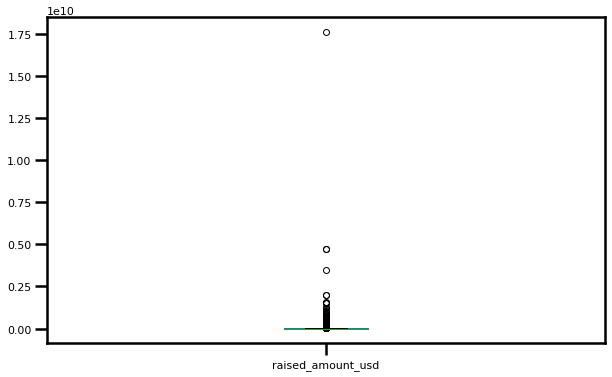

In [146]:
master_frame_dropnull.plot.box(figsize=(10,6))

#### Coming back to the null value treatment and outlier treatment

In [31]:
#master_frame_dropnull = master_frame_dropnull.sort_values('raised_amount_usd',ascending=False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
master_frame_dropnull.describe()

raised_amount_usd
count           80627.00
mean          9347994.74
std          75629397.45
min                 0.00
25%            400000.00
50%           2000000.00
75%           7975495.50
max       17600000000.00

##### Let's Further analyse raised_amount_usd as there are a lot of outliers and it has $ values that make no sense from an investement angle

#### Outlier Analysis Approach: we will remove only those extreme values that does not make busines sense

#### Rationale behind this approach: in this analysis, we are interested only in the past trend analysis for the recommendations to be made to Sparks Funds CEO. So we must retain all the valid business deals even if they are outliers in Statistical angle. Also, we are not applying any ML Model in this analysis that is sensitive to the outliers. For the purpose of trend analysis, we better keep all the valid investments even if they appear to be outliers from a Statistician’s angle. 

In [33]:
# Percentile values at different levels
print(master_frame_dropnull["raised_amount_usd"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

0.00             0.00
0.10         75000.00
0.20        250000.00
0.30        575000.00
0.40       1094007.60
0.50       2000000.00
0.60       3470418.80
0.70       6000000.00
0.80      10000000.00
0.90      20000000.00
1.00   17600000000.00
Name: raised_amount_usd, dtype: float64


In [36]:
# From quartile 0 to .1
print(master_frame_dropnull["raised_amount_usd"].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,00.8,0.09,.1]))

0.00          0.00
0.01      10000.00
0.02      17983.68
0.03      20000.00
0.04      25000.00
0.05      30000.00
0.06      40000.00
0.07      43856.30
0.80   10000000.00
0.09      56426.86
0.10      75000.00
Name: raised_amount_usd, dtype: float64


In [35]:
# From quartile 0.9 till the max
print(master_frame_dropnull["raised_amount_usd"].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]))

0.90      20000000.00
0.91      21000000.00
0.92      24000000.00
0.93      25000000.00
0.94      30000000.00
0.95      33000000.00
0.96      40000000.00
0.97      49000000.00
0.98      60000000.00
0.99     100000000.00
1.00   17600000000.00
Name: raised_amount_usd, dtype: float64


In [ ]:
# Examine different extreme values

In [39]:
# raised_amount_usd of 17600000000.00 (176 millions USD)
master_frame_dropnull['name'][master_frame_dropnull['raised_amount_usd'] == 17600000000.00]

37569    freescale semiconductor
Name: name, dtype: object

#### WIKIPEDIA: On September 15, 2006, Freescale agreed to a $17.6 billion buyout by a consortium led by Blackstone Group and its co investors, Carlyle Group, TPG Capital, and Permira. So it's correct business deal. 

In [41]:
# raised_amount_usd of  100000000.00 (100 mil USD)
master_frame_dropnull['name'][master_frame_dropnull['raised_amount_usd'] <= 10000.00]

174                        1lay
279                   24symbols
448         3d operations, inc.
592                          42
702                    500shops
                  ...          
114520                  zolvers
114644                     zoot
114695                     zova
114797                zumpsites
114942    zzzzapp wireless ltd.
Name: name, Length: 893, dtype: object

#### From the internet search and our business knowledge, we now know these extreme values of 176 and 100 mil USD are all valid business investements so we will not remove them

In [43]:
# Let's examine values on lower side
master_frame_dropnull['name'][master_frame_dropnull['raised_amount_usd'] <= 10000.00]

174                        1lay
279                   24symbols
448         3d operations, inc.
592                          42
702                    500shops
                  ...          
114520                  zolvers
114644                     zoot
114695                     zova
114797                zumpsites
114942    zzzzapp wireless ltd.
Name: name, Length: 893, dtype: object

#### Internet search shows that the investement as small as 10K USD are valid business deals AS SEED FUNDINGS

##### For example 1lay, founded in Moscow in 2013, received a seed funding of $210K in the last round. SOURCE - INTERNET

##### So we will remove outliers below 10K USD only that are not making any business sense

In [66]:
# Removing values below 10K USD
master_frame_dropnull = master_frame_dropnull[master_frame_dropnull['raised_amount_usd'] >= 10000.00]

In [74]:
master_frame_dropnull.describe()

raised_amount_usd
count           80005.00
mean          9420645.96
std          75918316.81
min             10000.00
25%            440073.00
50%           2000000.00
75%           8000000.00
max       17600000000.00

#### Imputing nulls/ Treating Null Values

In [73]:
master_frame_dropnull.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         51889
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3410
category_list                829
status                         0
country_code                4899
state_code                  6444
region                      5935
city                        5932
founded_at                 13368
dtype: int64

###### Inference on Null Value Imputation: we can very easily replace null values by 'NA' in all these categorical columns or even replace them by more logical values, looking at otther columns or mode. But we will do what is necessary for this analysis from a business angle. All thesse colums containing null values are NOT appearing anywhere in our business analysis so we can live with them in the interest of time and efforts. 

#### Finding suitable investement type for Sparks Funds

##### Mean values

In [68]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
(master_frame_dropnull.groupby('funding_round_type')['raised_amount_usd'].mean())/1000000 # Divided to get amy in Mil USD

funding_round_type
angel             0.97
private_equity   73.80
seed              0.73
venture          11.77
Name: raised_amount_usd, dtype: float64

#### Medean

In [76]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
(master_frame_dropnull.groupby('funding_round_type')['raised_amount_usd'].median())/1000000 # Divided to get amy in Mil USD

funding_round_type
angel             0.40
private_equity   20.00
seed              0.30
venture           5.00
Name: raised_amount_usd, dtype: float64

#### Inference: From the company's investement strategy Venture type is most suited so now only the data for ventute type is kept for any further analysis

In [79]:
master_frame_venture = master_frame_dropnull[master_frame_dropnull['funding_round_type'] == 'venture']
print(master_frame_venture.shape)

(50125, 16)


### Checkpoint 3: Country Analysis

#### The desscription and the objectives of this part of analysis

In [154]:
"""
This is the second goal of analysis — country analysis.

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. 
This is a part of its broader strategy to invest where most investments are occurring.

Spark Funds wants to see the top nine countries which have received the highest total funding 
(across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries 
(based on the total investment amount each country has received)

Identify the top three English-speaking countries in the data frame top9.

Results Expected: All codes for data frame top9. Fill out Table 3.1.

Table 3.1: Analysing the Top 3 English-Speaking Countries

 1. Top English-speaking country?             
 2. Second English-speaking country? 
 3. Third English-speaking country? 
 

Now you also know the three most investment-friendly countries and the most suited funding type for Spark Funds. 
Let us now focus on finding the best sectors in these countries.
"""

"\nThis is the second goal of analysis — country analysis.\n\nNow that you know the type of investment suited for Spark Funds, let's narrow down the countries.\n\nSpark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. \nThis is a part of its broader strategy to invest where most investments are occurring.\n\nSpark Funds wants to see the top nine countries which have received the highest total funding \n(across ALL sectors for the chosen investment type)\n\nFor the chosen investment type, make a data frame named top9 with the top nine countries \n(based on the total investment amount each country has received)\n\nIdentify the top three English-speaking countries in the data frame top9.\n\nResults Expected: All codes for data frame top9. Fill out Table 3.1.\n\nTable 3.1: Analysing the Top 3 English-Speaking Countries\n\n 1. Top English-speaking country?             \n 2. Second English-speaking country? \n 3. Third English-speaking cou

In [548]:
#master_frame_venture.head()

In [80]:
top9_series = (master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9))/1000000

In [166]:
print(top9_series)

country_code
USA   422510.84
CHN    39835.42
GBR    20245.63
IND    14391.86
CAN     9583.33
FRA     7259.54
ISR     6907.51
DEU     6346.96
JPN     3363.68
Name: raised_amount_usd, dtype: float64


In [81]:
country_codes_top9 = top9_series.index.values.tolist()
top9 = master_frame_venture[master_frame_venture['country_code'].isin(country_codes_top9)]

In [82]:
print(country_codes_top9)

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']


In [83]:
top9.shape

(44307, 16)

In [549]:
#top9['country_code'].unique()

In [84]:
top3_en = top9[top9['country_code'].isin(['USA','GBR','IND'])]

In [85]:
print(top3_en.shape)
print(top3_en['country_code'].unique())

(38949, 16)
['IND' 'USA' 'GBR']


#### Inference: Top three English speaking countries that attacted highest investement in decending order are USA, GBR, IND

### Checkpoint 4: Sector Analysis 1

#### Description and Objectives

In [178]:
""" This is the third goal of analysis — sector analysis.

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file 
(note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists 
(named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists 
such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.


Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). 
For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered 
the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also 
considered one of the main sectors)

Expected Results: Code for a merged data frame with each primary sector mapped to its main sector 
(the primary sector should be present in a separate column)."""

" This is the third goal of analysis — sector analysis.\n\nWhen we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file \n(note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists \n(named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists \nsuch as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.\n\n\nAlso, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). \nFor example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.\n\nYou discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered \nthe primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.\n\nExtract the primary sector of e

In [550]:
#df_mapping.head(10)

In [551]:
#master_frame_venture.head(5)

In [86]:
master_frame_venture.category_list.nunique()

10536

In [87]:
df_mapping.category_list.nunique()

687

In [88]:
#df_mapping.isnull().sum()
df_mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [552]:
# Examining for any anamolies in mapping.category_list
#df_mapping.category_list.unique()

In [189]:
""" If you observe closely you can observe entries, for example, 
Business A0lytics
Can0bis
Ma0gement
Contact Ma0gement
Digital Sig0ge
Document Ma0gement
Educatio0l
Gover0nce
Innovation Ma0gement



" If you observe closely you can observe entries, for example, \nBusiness A0lytics\nCan0bis\nMa0gement\nContact Ma0gement\nDigital Sig0ge\nDocument Ma0gement\nEducatio0l\nGover0nce\nInnovation Ma0gement\n\nIf you replace '0' with 'na', many of them will be corrected but not all like Educatio0l. \nWe can live with it for now, else you have top choose each spelling and replace it by \ncorrect one, which will be very time consuming. So let's proceed for now"

#### If you replace '0' with 'na', many of them will be corrected but not all like Educatio0l. We can live with it for now, else you have top choose each spelling and replace it by correct one, which will be very time consuming. So let's proceed for now

#### Even if miss a couple of rows because of wrong matching while joining the tables, it may not affect the trend analysis as we have enough observations.

In [89]:
df_mapping['category_list']=df_mapping['category_list'].str.replace('0','na')

In [553]:
#df_mapping.category_list.unique() # Looks like the command did its job

In [90]:
# Creating seperate primary sector after removing the delimiter '|'
master_frame_venture_prim_sect = master_frame_venture['category_list'].str.split('|',n=1,expand=True)

In [91]:
print(master_frame_venture_prim_sect.shape)
print(master_frame_venture_prim_sect.head()) # Two splits created. We need only the first one.

(50125, 2)
                0             1
0           Media          None
3            Apps  Games|Mobile
4     Curated Web          None
8   Biotechnology          None
10      Analytics          None


In [92]:
master_frame_venture['primary_sector'] = master_frame_venture_prim_sect[0]

In [554]:
#master_frame_venture.head(1) # The commands did the intented jobs

#### Create proper mapping column out of df_mapping

In [93]:
x=df_mapping.iloc[:,1:]
x=x.idxmax(axis=1)

In [94]:
print(x)

0                                       Blanks
1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Length: 688, dtype: object


In [95]:
df_mapping.shape

(688, 10)

In [555]:
#df_mapping.columns

In [96]:
df_mapping_primary_to_main = pd.DataFrame([df_mapping.category_list, x])

In [556]:
#df_mapping_primary_to_main.head()

In [97]:
df_mapping_primary_to_main_t = df_mapping_primary_to_main.transpose()

In [98]:
df_mapping_primary_to_main_t

category_list                                Unnamed 0
0                 NaN                                   Blanks
1                  3D                            Manufacturing
2         3D Printing                            Manufacturing
3       3D Technology                            Manufacturing
4          Accounting  Social, Finance, Analytics, Advertising
..                ...                                      ...
683         Wholesale                                   Others
684  Wine And Spirits                            Entertainment
685          Wireless                            Entertainment
686             Women                                   Others
687      Young Adults                                   Others

[688 rows x 2 columns]

In [99]:
# Appropriately name the columns
df_mapping_primary_to_main_t.rename({'category_list': 'primary_sector', 'Unnamed 0': 'main_sector'}, axis=1, inplace=True)

In [557]:
#df_mapping_primary_to_main_t.head()

In [558]:
#df_mapping_primary_to_main_t.tail() # Looks the mapping commands worked correctly

In [100]:
df_mapping_primary_to_main_t.isnull().sum()

primary_sector    1
main_sector       0
dtype: int64

In [101]:
df_mapping_primary_to_main_t.shape

(688, 2)

In [102]:
df_mapping_primary_to_main_t.dropna(inplace=True)

In [103]:
df_mapping_primary_to_main_t.isnull().sum()

primary_sector    0
main_sector       0
dtype: int64

#### Merge df_mapping_primary_to_main_t with master_frame_venture_prim_sect

In [104]:
df_mapping_final = df_mapping_primary_to_main_t.copy() 
master_frame_temp = master_frame_venture.copy() 
# master_frame_final will be created after merging these two data frames

In [559]:
#master_frame_temp.head(1)

In [105]:
df_mapping_final.head(1)

primary_sector    main_sector
1             3D  Manufacturing

In [106]:
master_frame_final = pd.merge(master_frame_temp, df_mapping_final, how='inner', left_on=['primary_sector'], right_on=['primary_sector'])

In [560]:
#master_frame_final.head(1)

In [561]:
#master_frame_final.tail(1)

In [113]:
master_frame_final['raised_amount_usd_mils'] = round((master_frame_final['raised_amount_usd']/1000000),2)
#master_frame_final.head(1)

#### Inference: The Check Point 4 is completed. Extraxcted primary_sector and mapped it to the main sector in the table master_frame_final itself

### Checkpoint 5: Sector Analysis 2

#### Observations and objectives

In [291]:
""" Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, 
we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. 
Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

Now, the aim is to find out the most heavily invested main sectors in each of the three countries 
(for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT 
falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

Result Expected 

Three data frames D1, D2 and D3 

Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in?
Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), 
but it should be based on the basic strategy — invest in sectors where most investments are occurring. """

" Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, \nwe refer to one of the eight main sectors.\n\nAlso, you know the top three English speaking countries and the most suitable funding type for Spark Funds. \nLet’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.\n\nAlso, the range of funding preferred by Spark Funds is 5 to 15 million USD.\n\nNow, the aim is to find out the most heavily invested main sectors in each of the three countries \n(for funding type FT and investments range of 5-15 M USD).\n\nCreate three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT \nfalling within the 5-15 million USD range. The three data frames should contain:\n\nAll the columns of the master_frame along with the primary sector and the main sector\n\nThe total number (or count) of investments for each main sector in a separate co

### Check nulls in primary_sector & main_sector          


In [ ]:
# master_frame_dropnull = master_frame[master_frame['raised_amount_usd'].notnull()]


In [114]:
master_frame_final.isnull().sum() # No nulls in these two fields. also no nulls in funding type

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         21803
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2432
category_list                  0
status                         0
country_code                1901
state_code                  2630
region                      2488
city                        2488
founded_at                  9200
primary_sector                 0
main_sector                    0
raised_amount_usd_mils         0
dtype: int64

In [115]:

master_frame_final.country_code.value_counts()

USA    35724
GBR     2031
CHN     1547
CAN     1242
FRA      911
       ...  
SEN        1
TUN        1
BAH        1
GGY        1
KWT        1
Name: country_code, Length: 97, dtype: int64

#### Creating three separate data frames D1, D2 and D3 for each of the top three countries containing the observations of funding type FT falling within the 5-15 million USD range. We have average funding amount of venture type	11.75 Mil USD that falls within 5-15 million USD range

In [116]:
master_frame_final.funding_round_type.value_counts()  # The table is already filtered for it. Good to proceed!           

venture    49433
Name: funding_round_type, dtype: int64

In [117]:
# Filter investements only between 5 to 15 Mil USD
master_frame_final = master_frame_final[master_frame_final['raised_amount_usd_mils'].between(5.0,15.0,inclusive=True)]


In [118]:
master_frame_final['raised_amount_usd_mils'].value_counts() # Great! It works well....

10.00    1817
5.00     1724
15.00    1087
6.00      987
8.00      868
         ... 
11.64       1
14.46       1
12.84       1
12.42       1
6.46        1
Name: raised_amount_usd_mils, Length: 882, dtype: int64

#### We have trhe following results. Let's proceed to create D1, D2 & D3 for each of these top 3 investement friendly countries
#1	Top English speaking country	USA
#2	Second English speaking country	GBR
#3	Third English speaking country	IND

In [119]:
D1 = master_frame_final[master_frame_final.country_code == 'USA']
D2 = master_frame_final[master_frame_final.country_code == 'GBR']
D3 = master_frame_final[master_frame_final.country_code == 'IND']

D1.head(1) # Sanity check

company_permalink  \
4  /organization/all-def-digital   

                           funding_round_permalink funding_round_type  \
4  /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   

  funding_round_code   funded_at  raised_amount_usd  \
4                  A  06-08-2014         5000000.00   

                       permalink             name              homepage_url  \
4  /organization/all-def-digital  all def digital  http://alldefdigital.com   

  category_list     status country_code state_code       region         city  \
4         Media  operating          USA         CA  Los Angeles  Los Angeles   

  founded_at primary_sector    main_sector  raised_amount_usd_mils  
4        NaN          Media  Entertainment                    5.00

In [366]:
# Aggregate main_sector count and sum for raised_amount_usd_mils for D1
D1 = D1.assign(invest_count_main_sect =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(total_invest_milUSD =D1.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))


In [368]:
D1.head(1) # Sanity check

permalink             name              homepage_url  \
4  /organization/all-def-digital  all def digital  http://alldefdigital.com   

  category_list     status country_code state_code       region         city  \
4         Media  operating          USA         CA  Los Angeles  Los Angeles   

  founded_at  ...                          funding_round_permalink  \
4        NaN  ...  /funding-round/452a2342fe720285c3b92e9bd927d9ba   

  funding_round_type funding_round_code   funded_at raised_amount_usd  \
4            venture                  A  06-08-2014        5000000.00   

   primary_sector    main_sector raised_amount_usd_mils  \
4           Media  Entertainment                   5.00   

   invest_count_main_sect  total_invest_milUSD  
4                     591              5099.21  

[1 rows x 21 columns]

In [120]:
# Aggregate main_sector count and sum for raised_amount_usd_mils for D2 & D3
D2 = D2.assign(invest_count_main_sect =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(total_invest_milUSD =D2.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

D3 = D3.assign(invest_count_main_sect =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(total_invest_milUSD =D3.groupby('main_sector')['raised_amount_usd_mils'].transform('sum'))

In [563]:
#D3.head(1) # Sanity check

In [121]:
print('D1',D1.shape) # Sanity check
print('D2',D2.shape)
print('D3',D3.shape) # Thinngs look fine till here.. Let's proceed to fill out Table 5.1 .. Another big task :-)

D1 (12044, 19)
D2 (620, 21)
D3 (328, 21)


In [380]:
#D1.tail(2)

In [122]:
# Total number of investements Dx (x = 1,2,3)
# D1, USA
print(D1.shape[0])
# D2, GBR
print(D2.shape[0])
# D3, IND
print(D3.shape[0])

12044
620
328


In [124]:
# Total number amount of investements Dx (x = 1,2,3)
# D1, USA
print('D1',round((D1['raised_amount_usd_mils'].sum()),2))
# D2, GBR
print('D2',round((D2['raised_amount_usd_mils'].sum()),2))
# D3, IND
print('D3',round((D3['raised_amount_usd_mils'].sum()),2))

D1 107578.4
D2 5380.22
D3 2949.55


In [125]:
# Top Sector name (no. of investment-wise) Dx (x = 1,2,3)
# D1, USA
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])
# D2, GBR
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])
# D3, IND
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0])

D1 Others
D2 Others
D3 Others


In [126]:
# Second Sector name (no. of investment-wise) Dx (x = 1,2,3)
# D1, USA
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])
# D2, GBR
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])
# D3, IND
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1])

D1 Social, Finance, Analytics, Advertising
D2 Social, Finance, Analytics, Advertising
D3 Social, Finance, Analytics, Advertising


In [127]:
# Third Sector name (no. of investment-wise) Dx (x = 1,2,3)
# D1, USA
print('D1',D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])
# D2, GBR
print('D2',D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])
# D3, IND
print('D3',D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2])

D1 Cleantech / Semiconductors
D2 Cleantech / Semiconductors
D3 News, Search and Messaging


In [128]:
# Number of investments in top sector (3) Dx (x = 1,2,3)
# D1, USA
print('D1',D1[D1['main_sector'] == 'Others'].shape[0])
# D2, GBR
print('D2',D2[D2['main_sector'] == 'Others'].shape[0])
# D3, IND
print('D3',D3[D3['main_sector'] == 'Others'].shape[0])

D1 2958
D2 148
D3 110


In [129]:
# Number of investments in second sector (4)  Dx (x = 1,2,3)
# D1, USA
print('D1',D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
# D2, GBR
print('D2',D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])
# D3, IND
print('D3',D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].shape[0])

D1 2718
D2 133
D3 60


In [130]:
# Number of investments in third sector (5)  Dx (x = 1,2,3)
# D1, USA
print('D1',D1[D1['main_sector'] == 'Cleantech / Semiconductors'].shape[0])
# D2, GBR
print('D2',D2[D2['main_sector'] == 'Cleantech / Semiconductors'].shape[0])
# D3, IND
print('D3',D3[D3['main_sector'] == 'News, Search and Messaging'].shape[0])

D1 2305
D2 128
D3 52


In [131]:
# For point 3 (top sector count-wise), which company received the highest investment? Dx (x = 1,2,3)
# D1, USA
print('D1',D1[D1['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
# D2, GBR
print('D2',D2[D2['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
# D3, IND
print('D3',D3[D3['main_sector'] == 'Others'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])


D1 decisyon
D2 notonthehighstreet
D3 commonfloor


In [132]:
# For point 4 (second best sector count-wise), which company received the highest investment? Dx (x = 1,2,3)
# D1, USA
print('D1',D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
# D2, GBR
print('D2',D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])
# D3, IND
print('D3',D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_mils', ascending = False).head(1)['name'].values[0])


D1 three stage media
D2 mythings
D3 shiram credit


### Check Point 6: Plots

In [414]:
"""As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following 
plots:

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount
of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited 
for Spark Funds.

A plot showing the top 9 countries against the total amount of investments of funding type FT. 
This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
(for the chosen investment type FT). 

This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3. """


'As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following \nplots:\n\nA plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount\nof investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited \nfor Spark Funds.\n\nA plot showing the top 9 countries against the total amount of investments of funding type FT. \nThis should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.\n\nA plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart \n(for the chosen investment type FT). \n\nThis plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3. '

#### Plot 1: A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.

In [140]:
master_frame_dropnull['raised_amount_usd_mil'] = master_frame_dropnull['raised_amount_usd']/1000000

In [141]:
master_frame_dropnull.groupby('funding_round_type')['raised_amount_usd_mil'].sum()

funding_round_type
angel              4659.05
private_equity   141925.39
seed              16988.35
venture          590125.98
Name: raised_amount_usd_mil, dtype: float64

In [142]:
investement_mean = round(master_frame_dropnull.groupby('funding_round_type')['raised_amount_usd_mil'].mean(),2)

In [143]:
investement = master_frame_dropnull.groupby('funding_round_type')['raised_amount_usd_mil'].sum()
Invastement_fraction = round(investement/investement.sum(),2)*100

In [144]:
investement_metrics = pd.DataFrame(dict(investement_mean = investement_mean, Invastement_fraction = Invastement_fraction))

In [145]:
sns.set_context('poster',font_scale=0.8)

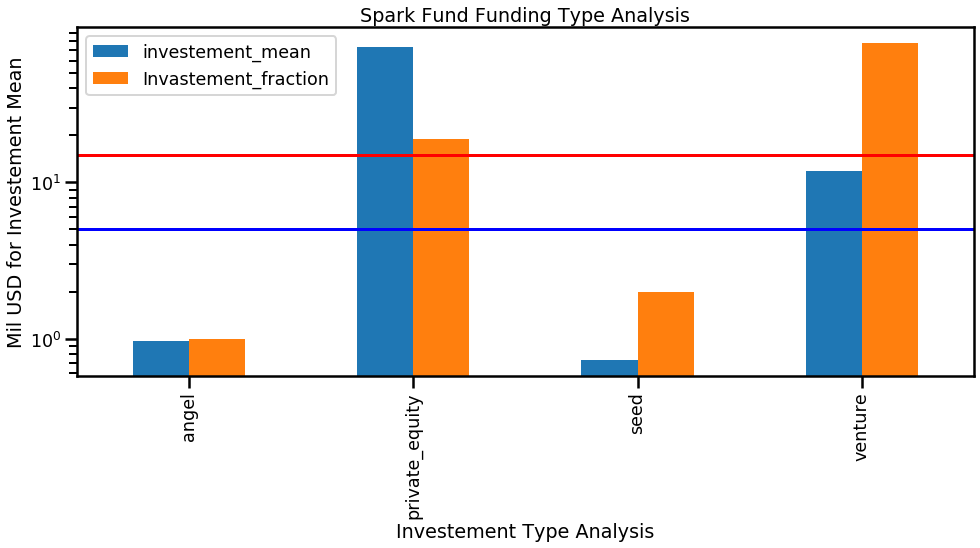

In [138]:
ax = investement_metrics.plot.bar(figsize=(14,8) )

plt.axhline(5, color='blue') # Investement limits of Spark Fund
plt.axhline(15, color='red')
plt.yscale('log')

ax.set_title('Spark Fund Funding Type Analysis')
ax.set_ylabel('Mil USD for Investement Mean')
ax.set_xlabel('Investement Type Analysis')

plt.tight_layout()
plt.show()



###### EXTRA: Plot showing the fraction in angel, venture, seed, and private equity

In [146]:
investement_metrics

investement_mean  Invastement_fraction
funding_round_type                                        
angel                           0.97                  1.00
private_equity                 73.80                 19.00
seed                            0.73                  2.00
venture                        11.77                 78.00

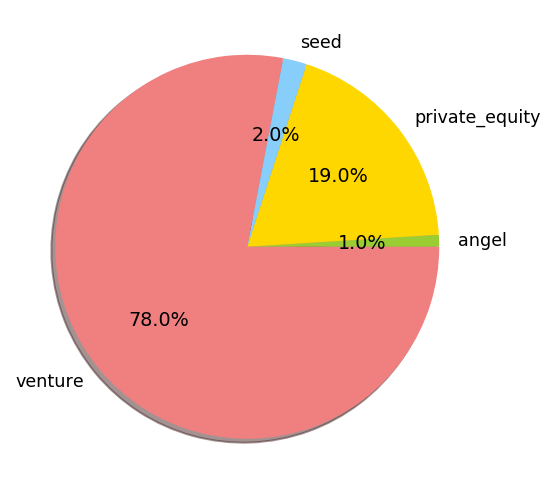

In [672]:
labels = 'angel', 'private_equity', 'seed', 'venture'
plt.figure(figsize=(8,8))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(Invastement_fraction,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.tight_layout()

###### EXTRA: showing the average amount of investment in each funding type.

In [149]:
#Reset index for getting funding type as a column
investement_metrics_mod = investement_metrics.reset_index()

In [150]:
# Function to auto label individual bars of the bar chart
def autolabel_bars(x_bars):
    
    for x_bar in x_bars:
        height = x_bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(x_bar.get_x() + x_bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points of offset (vertical)
                    textcoords="offset points",
                    ha='center', va='bottom')

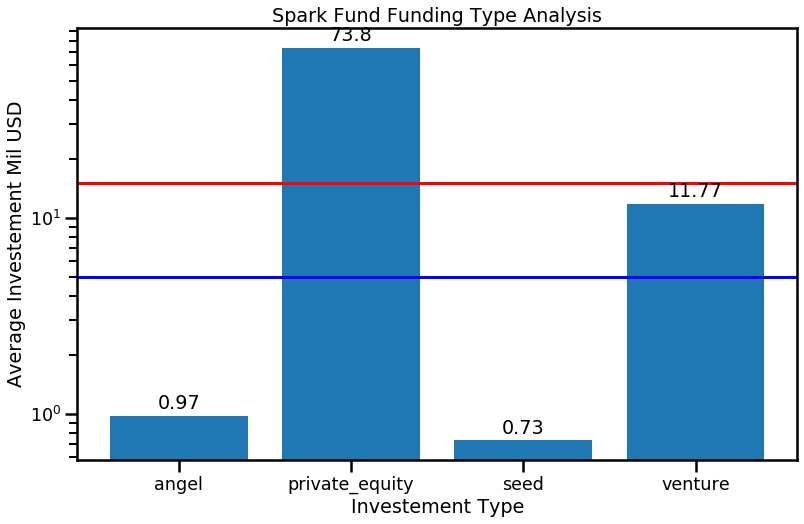

In [153]:
sns.set_context('poster',font_scale=0.8)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

bar = ax.bar(investement_metrics_mod['funding_round_type'], investement_metrics_mod['investement_mean'])
 
autolabel_bars(bar)

plt.yscale('log')

ax.set_title('Spark Fund Funding Type Analysis')
ax.set_ylabel('Average Investement Mil USD')
ax.set_xlabel('Investement Type')
plt.axhline(5, color='blue')
plt.axhline(15, color='red')
plt.tight_layout()
plt.show()

###### Average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

<function matplotlib.pyplot.show(*args, **kw)>

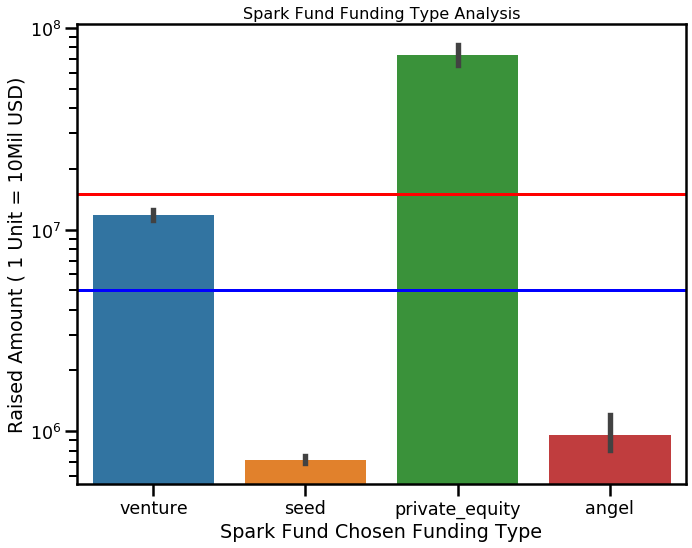

In [679]:
sns.set_context('poster',font_scale=0.8)
plt.figure(figsize=(10,8))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_dropnull)

g.set(xlabel='Spark Fund Chosen Funding Type', ylabel='Raised Amount ( 1 Unit = 10Mil USD)')
g.set_title('Spark Fund Funding Type Analysis',fontsize =16)

# Lines to mark investement limits of Spark Find
plt.axhline(5000000, color='blue')
plt.axhline(15000000, color='red')

plt.yscale('log')
plt.tight_layout()
plt.show


#### Plot 2:A plot showing the top 9 countries against the total amount of investments of funding type FT. 

In [420]:
#top9.columns

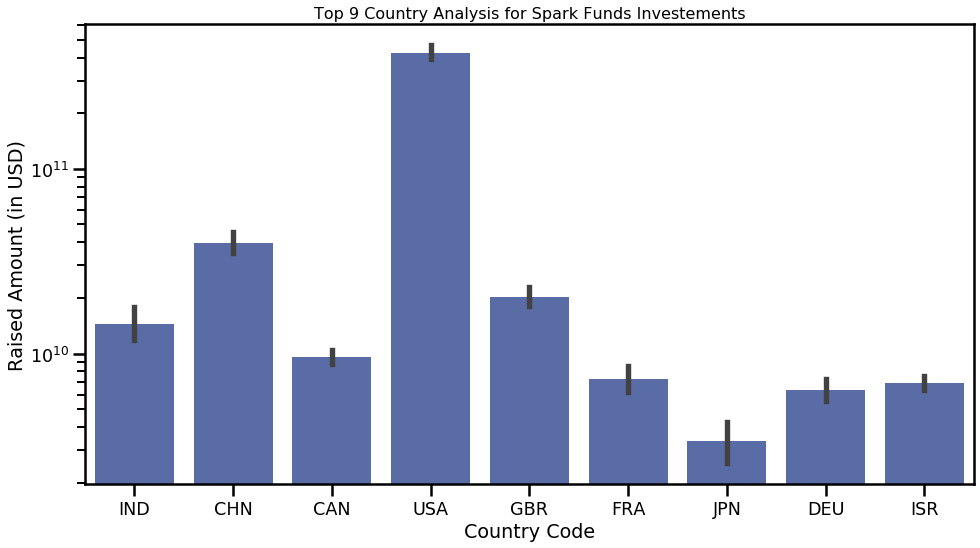

In [565]:
# bar plot with default statistic=mean
plt.figure(figsize=(14,8))
p=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.3, 0.4, 0.7, 0.8))

p.set_yscale('log')
p.set(xlabel='Country Code', ylabel='Raised Amount (in USD)')
p.set_title('Top 9 Country Analysis for Spark Funds Investements',fontsize =16)

plt.tight_layout()
plt.show()

#### Plot 3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)

In [428]:
""" The following are the top three sectors of USA, GBR, & IND (the top 3 English Speaking Countries in Investements)

1.'Others',
2.'Social, Finance, Analytics, Advertising',
3.'Cleantech / Semiconductors

So the following code lines will create a master table out of D1, D2, and D3 for these investement sectors'"""

" The following are the top three sectors of USA, GBR, & IND (the top 3 English Speaking Countries in Investements)\n\n1.'Others',\n2.'Social, Finance, Analytics, Advertising',\n3.'Cleantech / Semiconductors\n\nSo the following code lines will create a master table out of D1, D2, and D3 for these investement sectors'"

In [429]:
three_countries_sect_master=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [431]:
three_countries_sect_master=three_countries_sect_master.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [432]:
three_countries_sect_master=three_countries_sect_master.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [433]:
three_countries_sect_master.shape

(8612, 21)

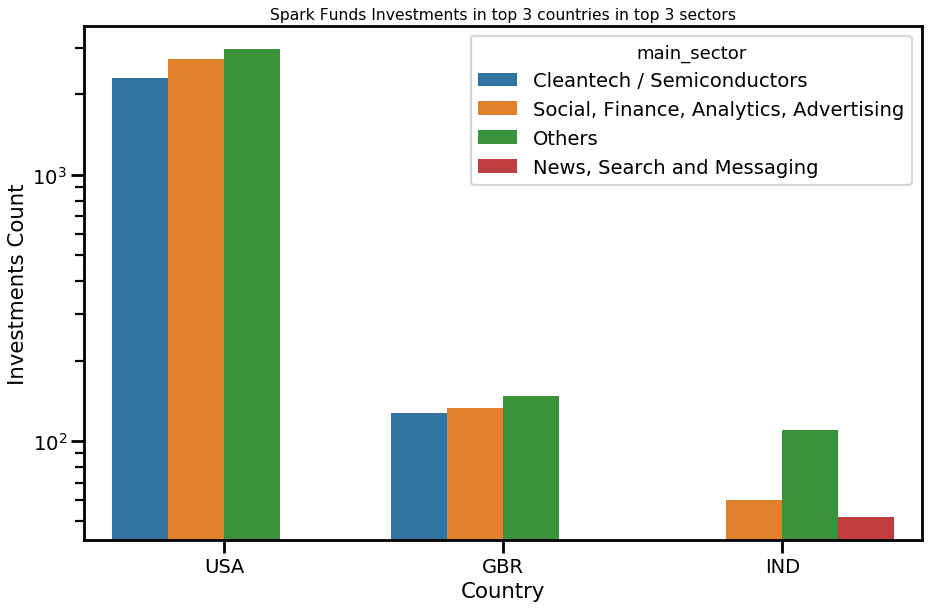

In [569]:
# Do the plot
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=three_countries_sect_master,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Investments Count')
s.set_title('Spark Funds Investments in top 3 countries in top 3 sectors',fontsize =14)

plt.yscale('log')
plt.tight_layout()
plt.show()

### End of Analysis submitted by Shailendra Kadre, PGD ML&AI, Batch June 2020